In [22]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
sf=pd.read_csv('https://raw.githubusercontent.com/arya1dragneel/Assignment/main/Salary_Data.csv')
df=pd.read_csv('https://raw.githubusercontent.com/arya1dragneel/Assignment/main/delivery_time.csv')

In [3]:
print(sf.head())  # sf salary data
print(df.head())  # df  delivery data

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0
   Delivery Time  Sorting Time
0          21.00            10
1          13.50             4
2          19.75             6
3          24.00             9
4          29.00            10


In [4]:
print(sf.info())
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes
None


In [5]:
print(sf.describe())
print(df.describe())

       YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000
       Delivery Time  Sorting Time
count      21.000000     21.000000
mean       16.790952      6.190476
std         5.074901      2.542028
min         8.000000      2.000000
25%        13.500000      4.000000
50%        17.830000      6.000000
75%        19.750000      8.000000
max        29.000000     10.000000


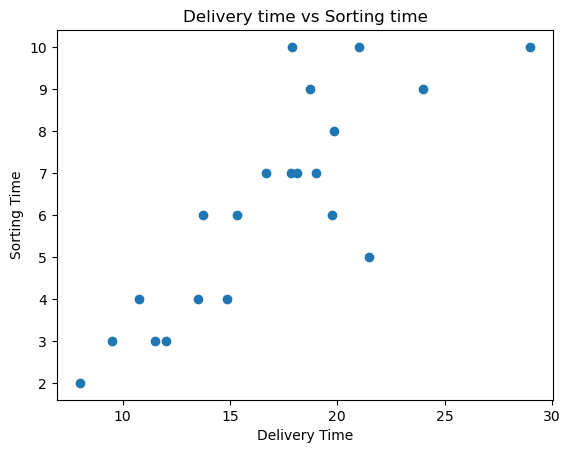

In [8]:
#EDA
#for delivery time
plt.scatter(df['Delivery Time'],df['Sorting Time'])
plt.xlabel('Delivery Time')
plt.ylabel('Sorting Time')
plt.title('Delivery time vs Sorting time')
plt.show()


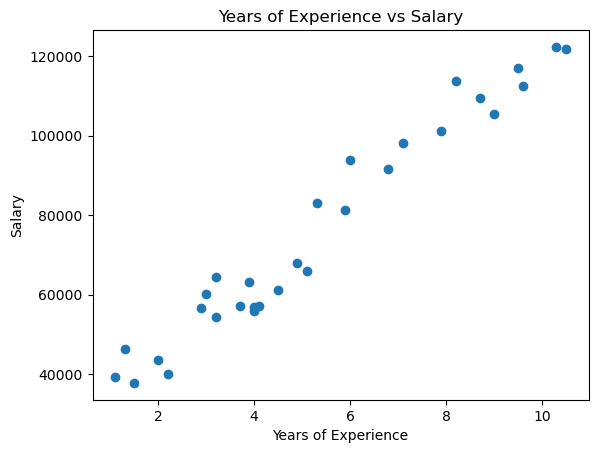

In [12]:
# for salary hike
plt.scatter(sf['YearsExperience'],sf['Salary'])
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Years of Experience vs Salary')
plt.show()

In [13]:
sf.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
dtype: bool

In [14]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
dtype: bool

<Axes: >

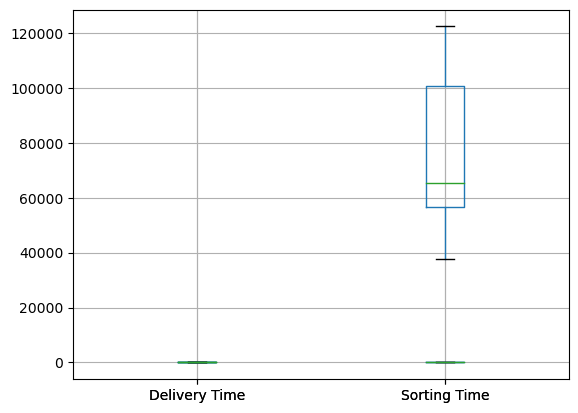

In [18]:
sf.boxplot()
df.boxplot()

In [19]:
sf.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [20]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


<Axes: >

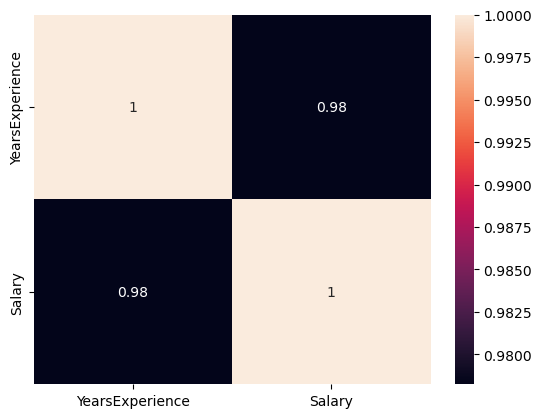

In [23]:
sns.heatmap(sf.corr(),annot=True)

<Axes: >

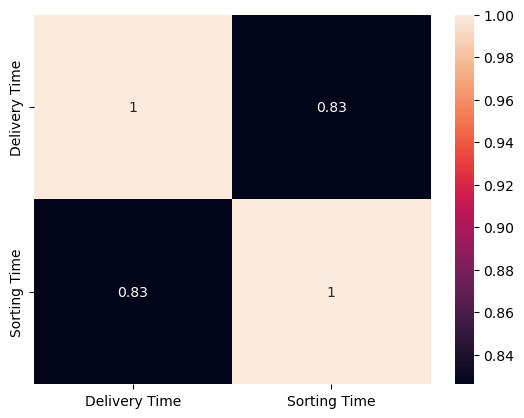

In [24]:
sns.heatmap(df.corr(),annot=True)

In [25]:
import statsmodels.formula.api as smf

In [27]:
model = smf.ols('Salary~YearsExperience',data=sf).fit()
model

In [28]:
#model parameter
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [29]:
model.pvalues

Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64

In [30]:
#r2 value
model.rsquared, model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [32]:
sf

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [33]:
test = pd.DataFrame({
    'YearsExperience' : [15,17,20,25,30]
})
test

,YearsExperience
0,15
1,17
2,20
3,25
4,30


In [34]:
model.predict(test)

0    167541.635020
1    186441.559663
2    214791.446628
3    262041.258235
4    309291.069842
dtype: float64

In [51]:
# for delivery
df.rename(columns={'Delivery Time':'Delivery_time','Sorting Time':'Sorting_time'},inplace=True)
df

,Delivery_time,Sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [53]:
model = smf.ols('Delivery_time~Sorting_time',data=df).fit()
model

In [54]:
model.params

Intercept       6.582734
Sorting_time    1.649020
dtype: float64

In [55]:
model.pvalues

Intercept       0.001147
Sorting_time    0.000004
dtype: float64

In [56]:
model.rsquared, model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [58]:
test = pd.DataFrame({
    'Sorting_time' : [2,9,10,15,20,25]
})
test

,Sorting_time
0,2
1,9
2,10
3,15
4,20
5,25


In [59]:
model.predict(test)

0     9.880774
1    21.423913
2    23.072933
3    31.318032
4    39.563132
5    47.808231
dtype: float64